# FLIGHT PRICE PREDICTION PROJECT

## Importing Libreries

In [98]:
#Import libreries 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings("ignore")

Importing all neccessory Libreries

## Importing dataset

In [99]:
#Import the dataset

df= pd.read_csv(r"C:\Users\Chaitali Nakade\FlightPricePrediction.csv")
df.head()

,Unnamed: 0,AIRLINE_NAME,FLIGHT_CODE,DATE_OF_JOURNEY,SOURCE,DESTINATION,DEPARTURE_TIME,ARRIVAL_TIME,DURATION,TOTAL_STOP,PRICE
0,0,IndiGo,6E-6413,29/11/2021,Nagpur,Mumbai,05:35,07:05,1:30,Non Stop,4566
1,1,IndiGo,6E-6207,29/11/2021,Nagpur,Mumbai,15:30,17:00,1:30,Non Stop,4566
2,2,Air India,AI-630,29/11/2021,Nagpur,Mumbai,21:10,23:05,1:55,Non Stop,4566
3,3,Go First,G8-2607,29/11/2021,Nagpur,Mumbai,20:15,21:45,1:30,Non Stop,4567
4,4,Go First,G8-601,29/11/2021,Nagpur,Mumbai,10:50,12:25,1:35,Non Stop,4567


Importing the dataset and see all columns with first five rows.

## Shape of data with number of rows and columns

In [100]:
df.shape

(4104, 11)

There are 4104 rows and 11 columns in dataset

## Detailed description

In [101]:
df.describe()

,Unnamed: 0,PRICE
count,4104.000000,4104.000000
mean,2051.500000,7421.677144
std,1184.867081,4082.924397
min,0.000000,2175.000000
25%,1025.750000,4717.000000
50%,2051.500000,6017.000000
75%,3077.250000,9723.000000
max,4103.000000,44428.000000


We can see the detailed description of all the rows and columns like count, mean value, standard deviation, minimum and maximum values.

## Datatypes of all columns

In [102]:
#check the data types of all the columns
df.dtypes

Unnamed: 0          int64
AIRLINE_NAME       object
FLIGHT_CODE        object
DATE_OF_JOURNEY    object
SOURCE             object
DESTINATION        object
DEPARTURE_TIME     object
ARRIVAL_TIME       object
DURATION           object
TOTAL_STOP         object
PRICE               int64
dtype: object

We have object datatypes ----> AIRLINE_NAME, FLIGHT_CODE, DATE_OF_JOURNEY, SOURCE, DESTINATION, DEPARTURE_TIME, ARRIVAL_TIME, DURATION, TOTAL_STOP.

Integer data types ----> Unnamed: 0, PRICE

all are independent variable accept PRICE. PRICE is target variable.

## Checking is there any null value in dataset

In [103]:
#check is there any null value present in any column

df.isnull().sum()

Unnamed: 0         0
AIRLINE_NAME       0
FLIGHT_CODE        0
DATE_OF_JOURNEY    0
SOURCE             0
DESTINATION        0
DEPARTURE_TIME     0
ARRIVAL_TIME       0
DURATION           0
TOTAL_STOP         0
PRICE              0
dtype: int64

There are no missing values in whole dataset. So, we no need to treat that.

## Visualization of null values

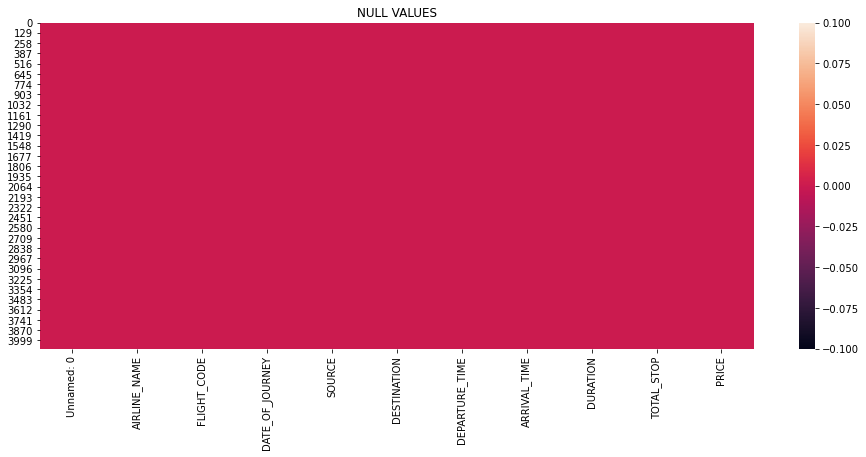

In [104]:
plt.figure(figsize=[16,6])
sn.heatmap(df.isnull())
plt.title("NULL VALUES")
plt.show()

As shown in plot the no white line present in it. So, Null values are not present in data set.

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4104 entries, 0 to 4103
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       4104 non-null   int64 
 1   AIRLINE_NAME     4104 non-null   object
 2   FLIGHT_CODE      4104 non-null   object
 3   DATE_OF_JOURNEY  4104 non-null   object
 4   SOURCE           4104 non-null   object
 5   DESTINATION      4104 non-null   object
 6   DEPARTURE_TIME   4104 non-null   object
 7   ARRIVAL_TIME     4104 non-null   object
 8   DURATION         4104 non-null   object
 9   TOTAL_STOP       4104 non-null   object
 10  PRICE            4104 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 352.8+ KB


We can see the complete information about data frame

## EDA (Exploratory Data Analysis)

### Visualization (Uni Variate analysis)
Uni variate analysis works with only one variable, hence it is called uni variate.

### Analysis through distplot

In [106]:
fe = df[['Unnamed: 0', 'PRICE']]

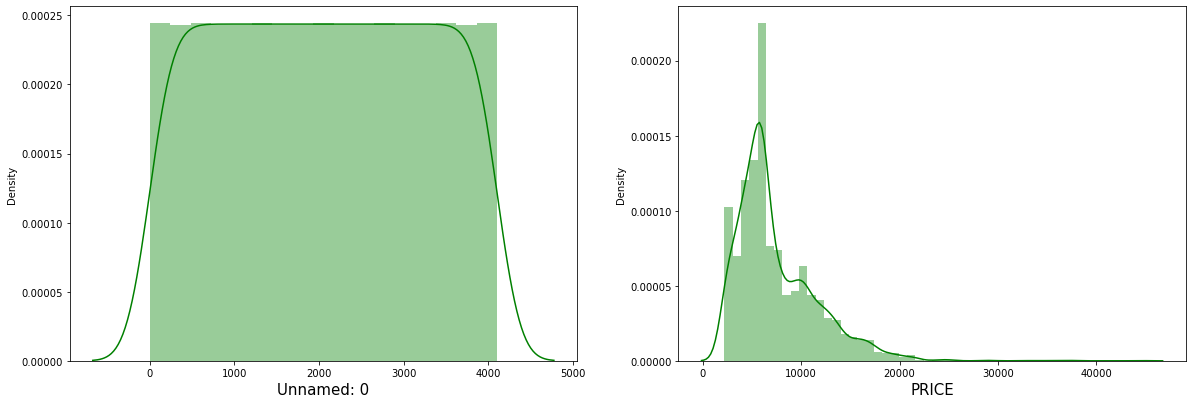

In [107]:
#Relationship Visualizing

plt.figure(figsize = (20,30), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 5: # as we see there are twentyfive columns in the data
        ax = plt.subplot(4,2,plotnumber)
        sn.distplot(fe[column], color = 'g')
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()

#####  PRICE is a target variable so need to worried about skewness and Unnamed column is not having skewness.

### Countplot

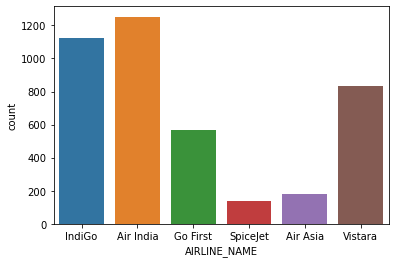

In [108]:
#visualization of variables 
sn.countplot(df["AIRLINE_NAME"])
plt.show()

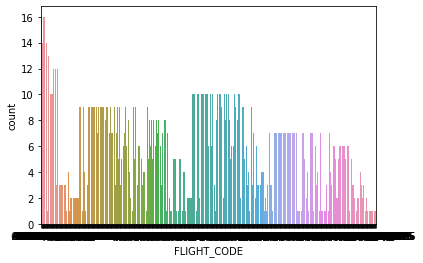

In [109]:
#visualization of variables 
sn.countplot(df["FLIGHT_CODE"])
plt.show()

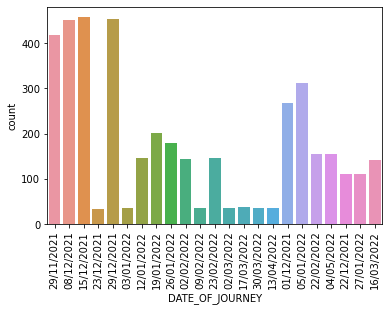

In [110]:
#visualization of variables 
sn.countplot(df["DATE_OF_JOURNEY"])
plt.xticks(rotation = 90)
plt.show()

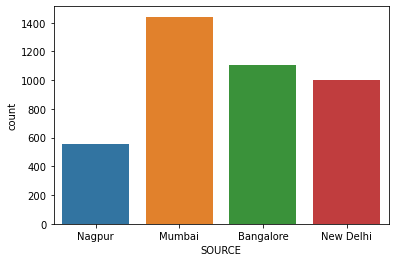

In [111]:
#visualization of variables 
sn.countplot(df["SOURCE"])
plt.show()

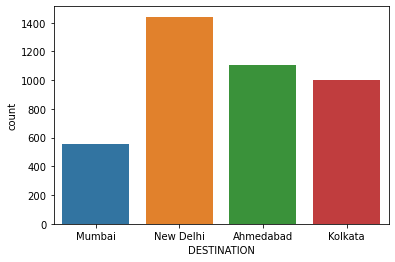

In [112]:
#visualization of variables 
sn.countplot(df["DESTINATION"])
plt.show()

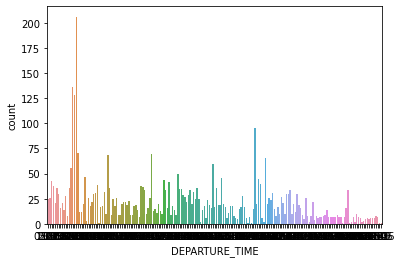

In [113]:
#visualization of variables 
sn.countplot(df["DEPARTURE_TIME"])
plt.show()

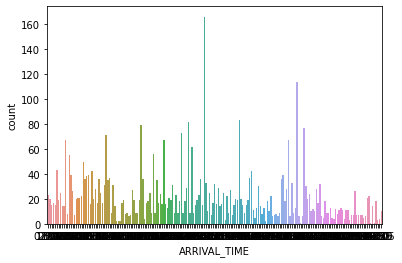

In [114]:
#visualization of variables 
sn.countplot(df["ARRIVAL_TIME"])
plt.show()

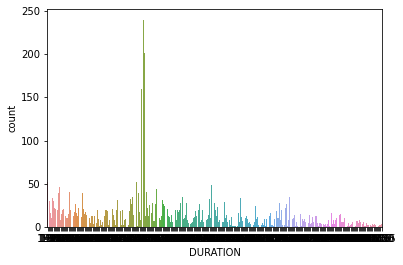

In [115]:
#visualization of variables 
sn.countplot(df["DURATION"])
plt.show()

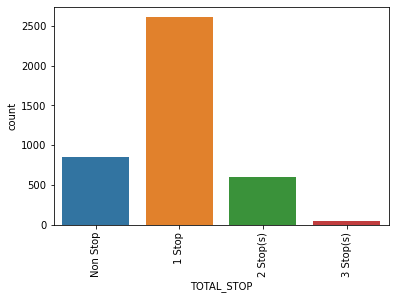

In [116]:
#visualization of variables 
sn.countplot(df["TOTAL_STOP"])
plt.xticks(rotation = 90)
plt.show()

### Analysis through boxplot

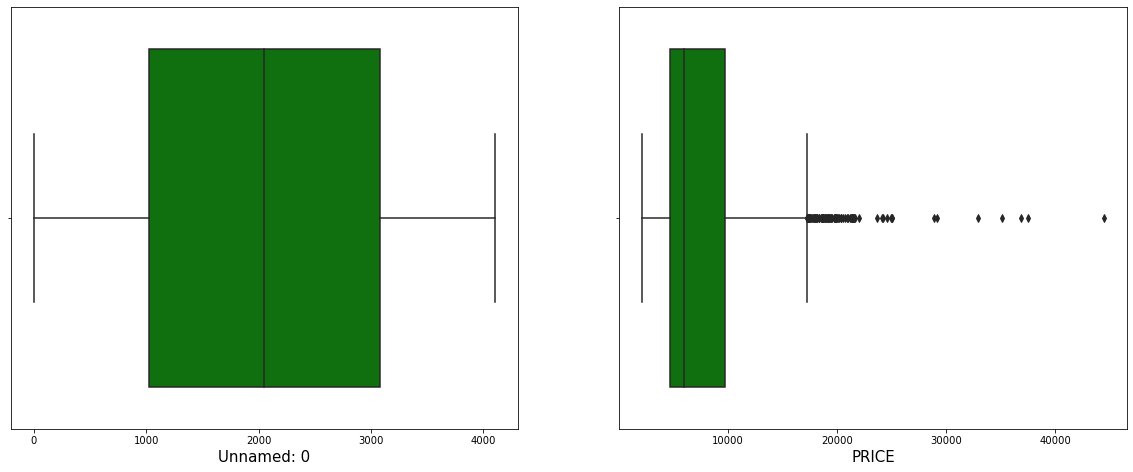

In [117]:
#Relationship Visualizing

plt.figure(figsize = (20,45), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 5: # as we see there are twentyfive columns in the data
        ax = plt.subplot(5,2,plotnumber)
        sn.boxplot(fe[column], color = 'g')
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()

#### No outliers are present in it as we know PRICE is a target variable.

### Analysis through histplot

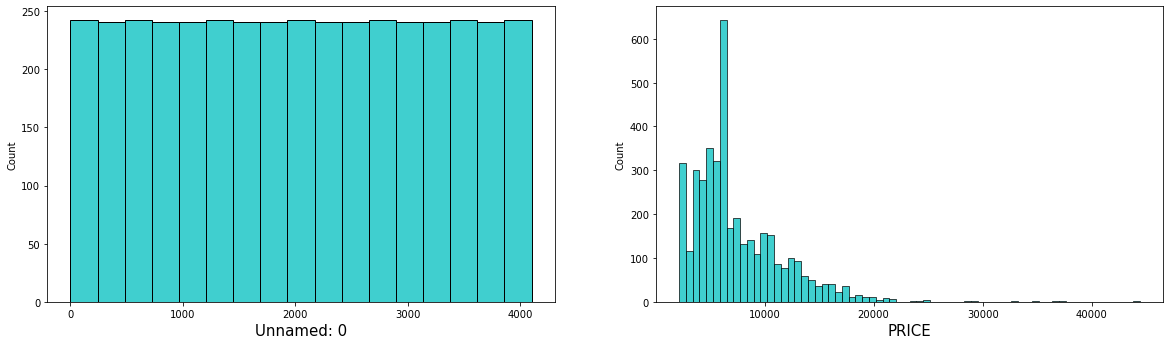

In [118]:
#Relationship Visualizing

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 5: # as we see there are twentyfive columns in the data
        ax = plt.subplot(4,2,plotnumber)
        sn.histplot(fe[column], color = 'c')
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()

## Bi variate analysis
Bi variate analysis is works with two variables.

In [119]:
df.dtypes

Unnamed: 0          int64
AIRLINE_NAME       object
FLIGHT_CODE        object
DATE_OF_JOURNEY    object
SOURCE             object
DESTINATION        object
DEPARTURE_TIME     object
ARRIVAL_TIME       object
DURATION           object
TOTAL_STOP         object
PRICE               int64
dtype: object

In [120]:
feature = df[['Unnamed: 0', 'AIRLINE_NAME', 'FLIGHT_CODE', 'DATE_OF_JOURNEY', 'SOURCE', 'DESTINATION', 'DEPARTURE_TIME', 'ARRIVAL_TIME', 'DURATION', 'TOTAL_STOP', 'PRICE']]

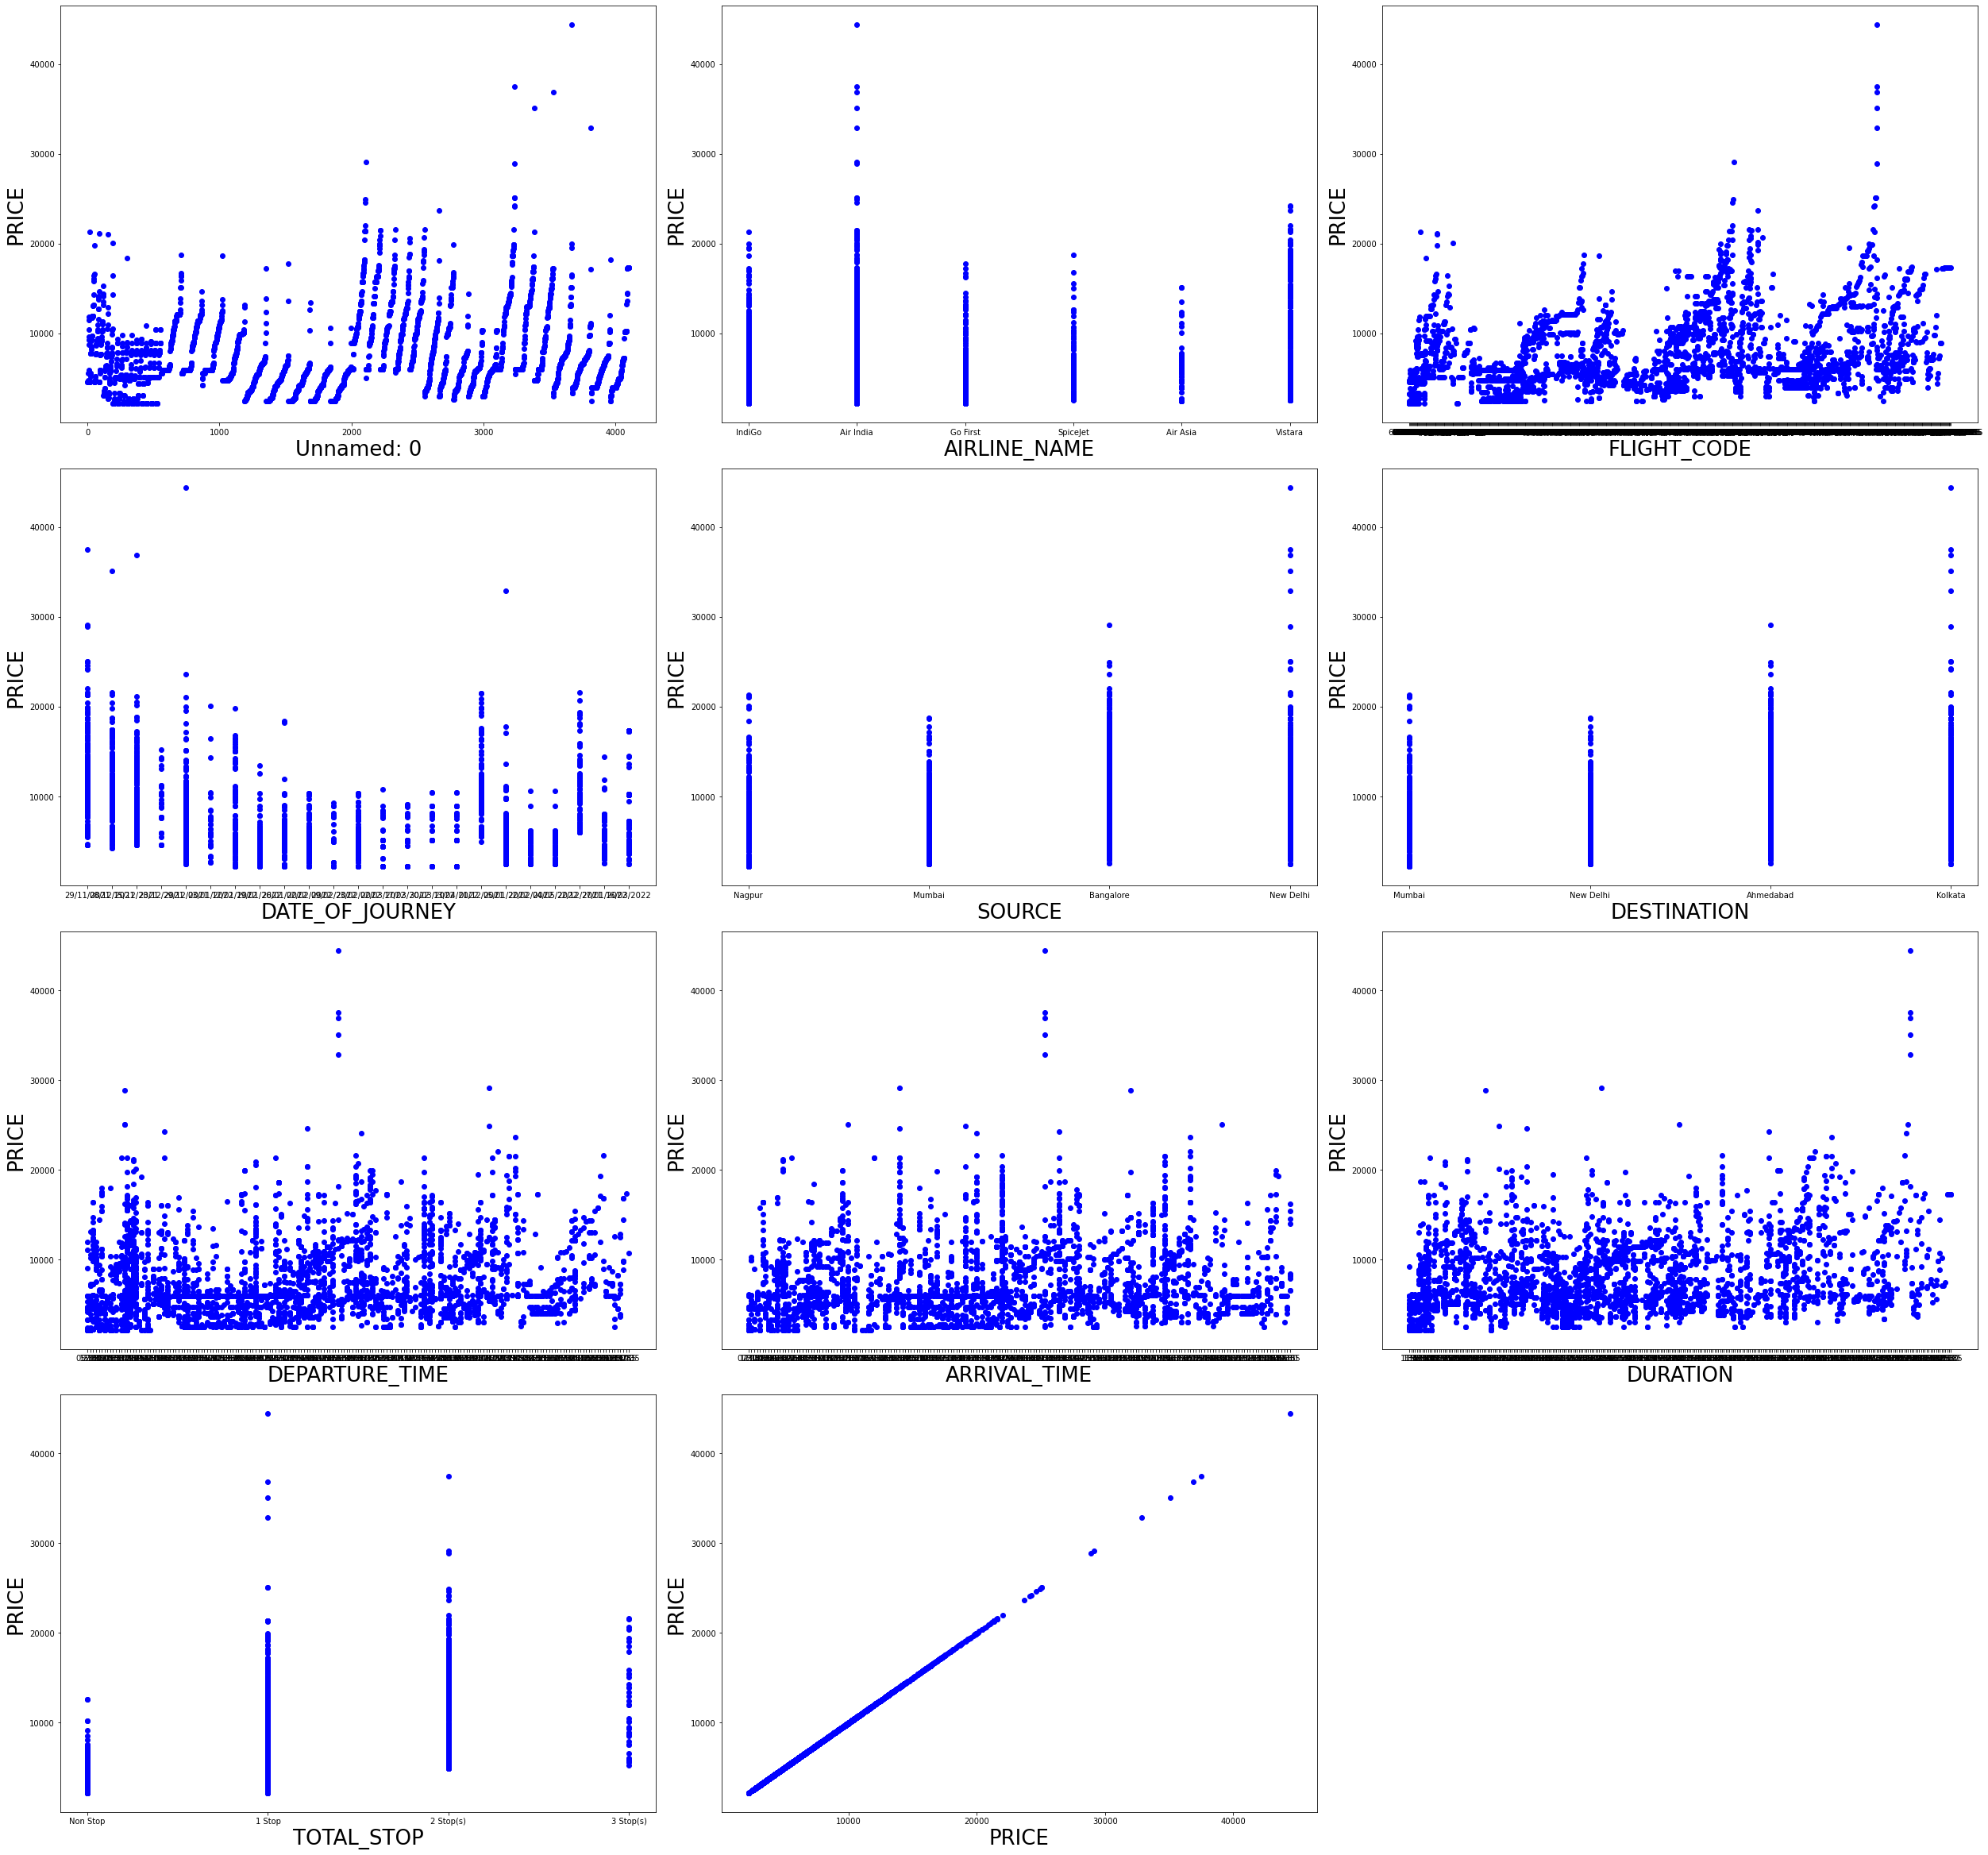

In [121]:
#Relationship Visualizing

plt.figure(figsize = (35,40), facecolor = 'white')
plotnumber = 1

for column in feature:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(feature[column],feature['PRICE'], color='b')
        plt.xlabel(column,fontsize=26)
        plt.ylabel('PRICE', fontsize=26)
    plotnumber += 1
plt.tight_layout()

There are some variables are having some amount of linear relationship with target variable
and some are having  non linear relationship with target variable.

As we see in the plot some outliers are also present in it.

## Multi Variate analysis
Multi variate analysis find the relationship with all variables.
Now we will visualize the data and check the coiefficient of multicollinearity

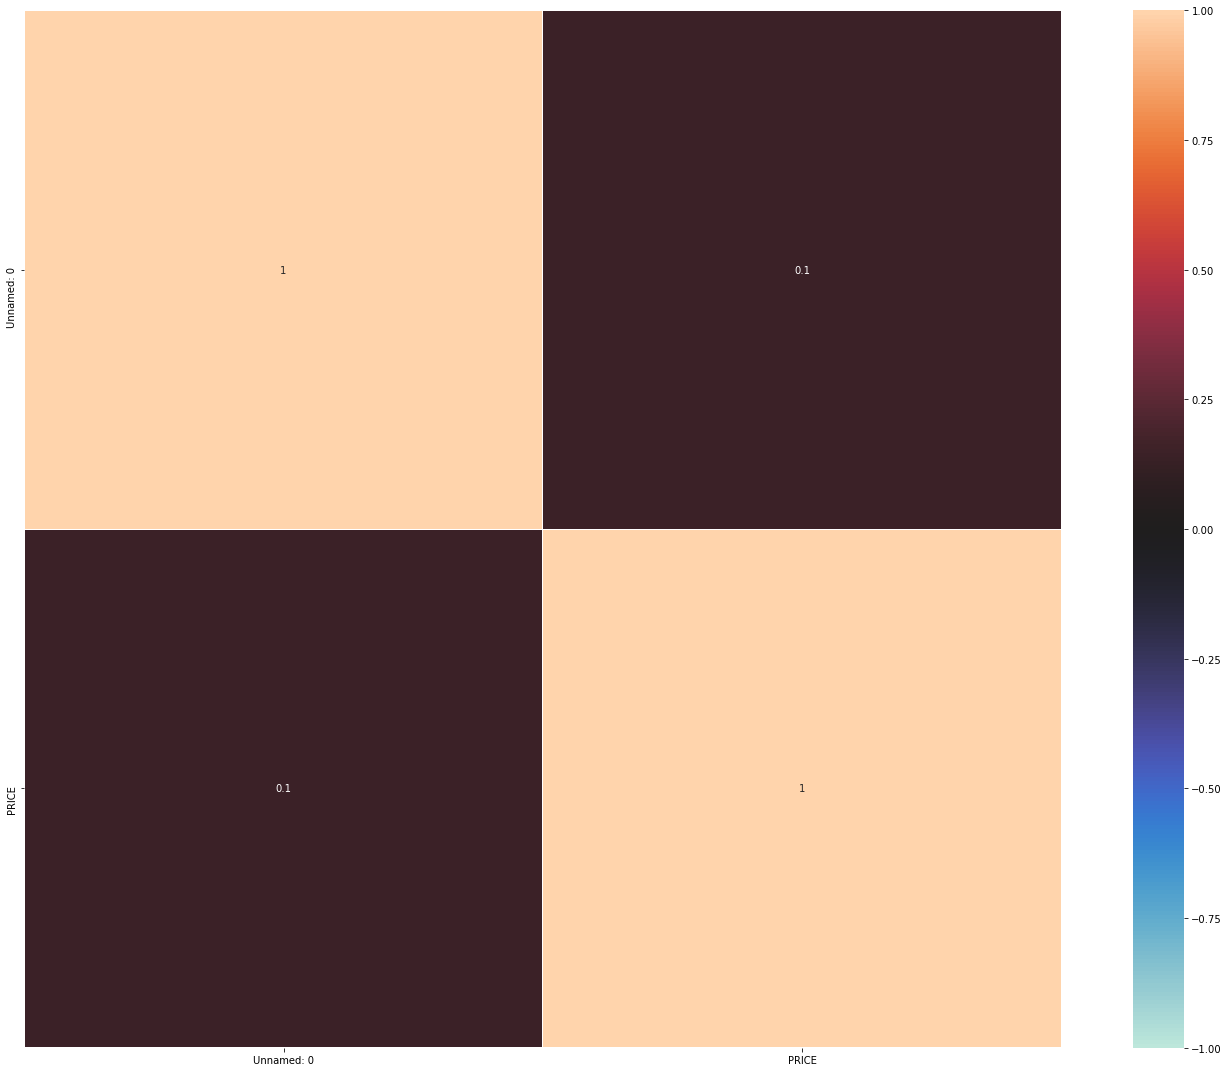

In [122]:
df_cor = df.corr().abs()

plt.figure(figsize = (20,15))
sn.heatmap(df_cor, vmin=-1, vmax= 1, annot=True, square=True,
          center=0, fmt='.1g', linewidths=.1)
plt.tight_layout()

##### As shown in plot other_fuel3, wepp_id, year_of_capacity_data and estimated_generation_gwh are not having relationship with target variable and other  input variables are almost having good relation with target variable.

##### latitude is also having poor corelation with target variable

## Find out which columns are positively and negatively correlated with each other

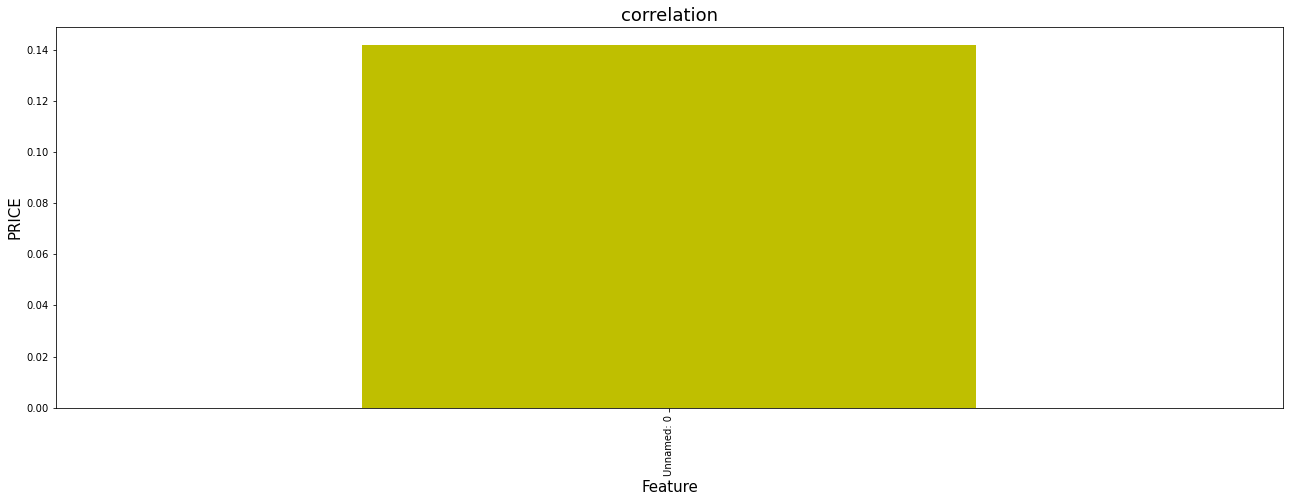

In [123]:
plt.figure(figsize=(22,7))
df.corr()['PRICE'].sort_values(ascending = False).drop(['PRICE']).plot(kind = 'bar', color = 'y')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('PRICE', fontsize = 15)
plt.title('correlation', fontsize = 18)
plt.show()

As shown in plot all features are negatively correlated with target variable. There are no positive correlation in it.

#### After visualization conclude that all input variables are having some/good amount relationship with target variable. Now proceed futher for next steps:

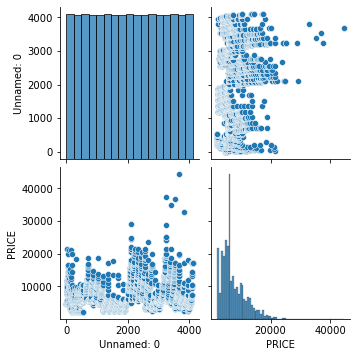

In [124]:
sn.pairplot(df)
plt.show()

In above pairplot we can see each and every coloumn relationship with each other.

## Encoding/dropping columns/Extract date, time column

#### 1. Drop Unnamed: 0 column

In [125]:
#drop Unnamed:0 column
df['Unnamed: 0'].unique()

array([   0,    1,    2, ..., 4101, 4102, 4103], dtype=int64)

In [126]:
# As we can see vlues of 'Unnamed: 0' column is having all unique values. so we can drop that column.
df=df.drop(['Unnamed: 0'], axis=1)

#### 2. AIRLINE_NAME

In [127]:
df['AIRLINE_NAME'].unique()

array(['IndiGo', 'Air India', 'Go First', 'SpiceJet', 'Air Asia',
       'Vistara'], dtype=object)

There are 6 unique values present in AIRLINE_NAME column.

In [128]:
df['AIRLINE_NAME'].value_counts()

Air India    1252
IndiGo       1126
Vistara       835
Go First      570
Air Asia      180
SpiceJet      141
Name: AIRLINE_NAME, dtype: int64

#### 3. FLIGHT_CODE

In [129]:
df['FLIGHT_CODE'].value_counts()

G8-141            16
AI-628            16
6E-6413           16
6E-297            16
6E-6207           16
                  ..
6E-3343/648        1
UK-845/818         1
UK-851/818         1
UK-865/808         1
UK-867/856/969     1
Name: FLIGHT_CODE, Length: 743, dtype: int64

#### 4. Extract DATE_OF_JOURNEY

In [131]:
df['DATE_OF_JOURNEY'].unique()

array(['29/11/2021', '08/12/2021', '15/12/2021', '23/12/2021',
       '29/12/2021', '03/01/2022', '12/01/2022', '19/01/2022',
       '26/01/2022', '02/02/2022', '09/02/2022', '23/02/2022',
       '02/03/2022', '17/03/2022', '30/03/2022', '13/04/2022',
       '01/12/2021', '05/01/2022', '22/02/2022', '04/05/2022',
       '22/12/2021', '27/01/2022', '16/03/2022'], dtype=object)

In [132]:
df["DATE_OF_JOURNEY"]=pd.to_datetime(df["DATE_OF_JOURNEY"])

In [133]:
df["Journey_Year"] = df["DATE_OF_JOURNEY"].dt.year

In [134]:
df["Journey_Month"] = df["DATE_OF_JOURNEY"].dt.month

In [135]:
df["Journey_day"] = df["DATE_OF_JOURNEY"].dt.day

In [136]:
#drop DATE_OF_JOURNEY column
df=df.drop(['DATE_OF_JOURNEY'], axis=1)

#### 5. SOURCE

In [137]:
df['SOURCE'].unique()

array(['Nagpur', 'Mumbai', 'Bangalore', 'New Delhi'], dtype=object)

In [138]:
df['SOURCE'].value_counts()

Mumbai       1442
Bangalore    1105
New Delhi    1001
Nagpur        556
Name: SOURCE, dtype: int64

#### 6. DESTINATION

In [139]:
df['DESTINATION'].unique()

array(['Mumbai', 'New Delhi', 'Ahmedabad', 'Kolkata'], dtype=object)

In [140]:
df['DESTINATION'].value_counts()

New Delhi    1442
Ahmedabad    1105
Kolkata      1001
Mumbai        556
Name: DESTINATION, dtype: int64

#### 7. Extract DEPARTURE_TIME

In [141]:
df['DEPARTURE_TIME'].value_counts()

08:25    206
21:00    136
07:00    128
17:50     95
09:20     71
        ... 
16:25      1
17:35      1
14:45      1
09:40      1
18:05      1
Name: DEPARTURE_TIME, Length: 191, dtype: int64

In [142]:
df["DEPARTURE_TIME"]=pd.to_datetime(df["DEPARTURE_TIME"])

In [143]:
df["Dep_Hour"] = df["DEPARTURE_TIME"].dt.hour

In [144]:
df["Dep_Minute"] = df["DEPARTURE_TIME"].dt.minute

In [145]:
#drop DEPARTURE_TIME column
df=df.drop(['DEPARTURE_TIME'], axis=1)

#### 8. ARRIVAL_TIME

In [146]:
df['ARRIVAL_TIME'].value_counts()

19:40    166
19:05    114
19:55     83
16:55     82
18:10     79
        ... 
11:50      2
14:25      2
15:15      1
01:05      1
16:00      1
Name: ARRIVAL_TIME, Length: 191, dtype: int64

In [147]:
df["ARRIVAL_TIME"]=pd.to_datetime(df["ARRIVAL_TIME"])

In [148]:
df["Arrival_Hour"] = df["ARRIVAL_TIME"].dt.hour

In [149]:
df["Arrival_Minute"] = df["ARRIVAL_TIME"].dt.minute

In [150]:
#drop ARRIVAL_TIME column
df=df.drop(['ARRIVAL_TIME'], axis=1)

In [151]:
df.dtypes

AIRLINE_NAME      object
FLIGHT_CODE       object
SOURCE            object
DESTINATION       object
DURATION          object
TOTAL_STOP        object
PRICE              int64
Journey_Year       int64
Journey_Month      int64
Journey_day        int64
Dep_Hour           int64
Dep_Minute         int64
Arrival_Hour       int64
Arrival_Minute     int64
dtype: object

#### 9. DURATION 

In [152]:
df['DURATION'].value_counts()

2:10     240
2:15     201
2:05     160
1:30      52
8:45      52
        ... 
8:25       1
15:40      1
20:55      1
37:40      1
16:25      1
Name: DURATION, Length: 292, dtype: int64

#### 10.TOTAL_STOP

In [153]:
df['TOTAL_STOP'].value_counts()

1 Stop       2608
Non Stop      847
2 Stop(s)     602
3 Stop(s)      47
Name: TOTAL_STOP, dtype: int64

In [154]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [155]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))

In [156]:
df.dtypes

AIRLINE_NAME      int32
FLIGHT_CODE       int32
SOURCE            int32
DESTINATION       int32
DURATION          int32
TOTAL_STOP        int32
PRICE             int64
Journey_Year      int64
Journey_Month     int64
Journey_day       int64
Dep_Hour          int64
Dep_Minute        int64
Arrival_Hour      int64
Arrival_Minute    int64
dtype: object

as shown above all columns are encoded now.

## Visualization of all input variables correlation with targate variable after encoding

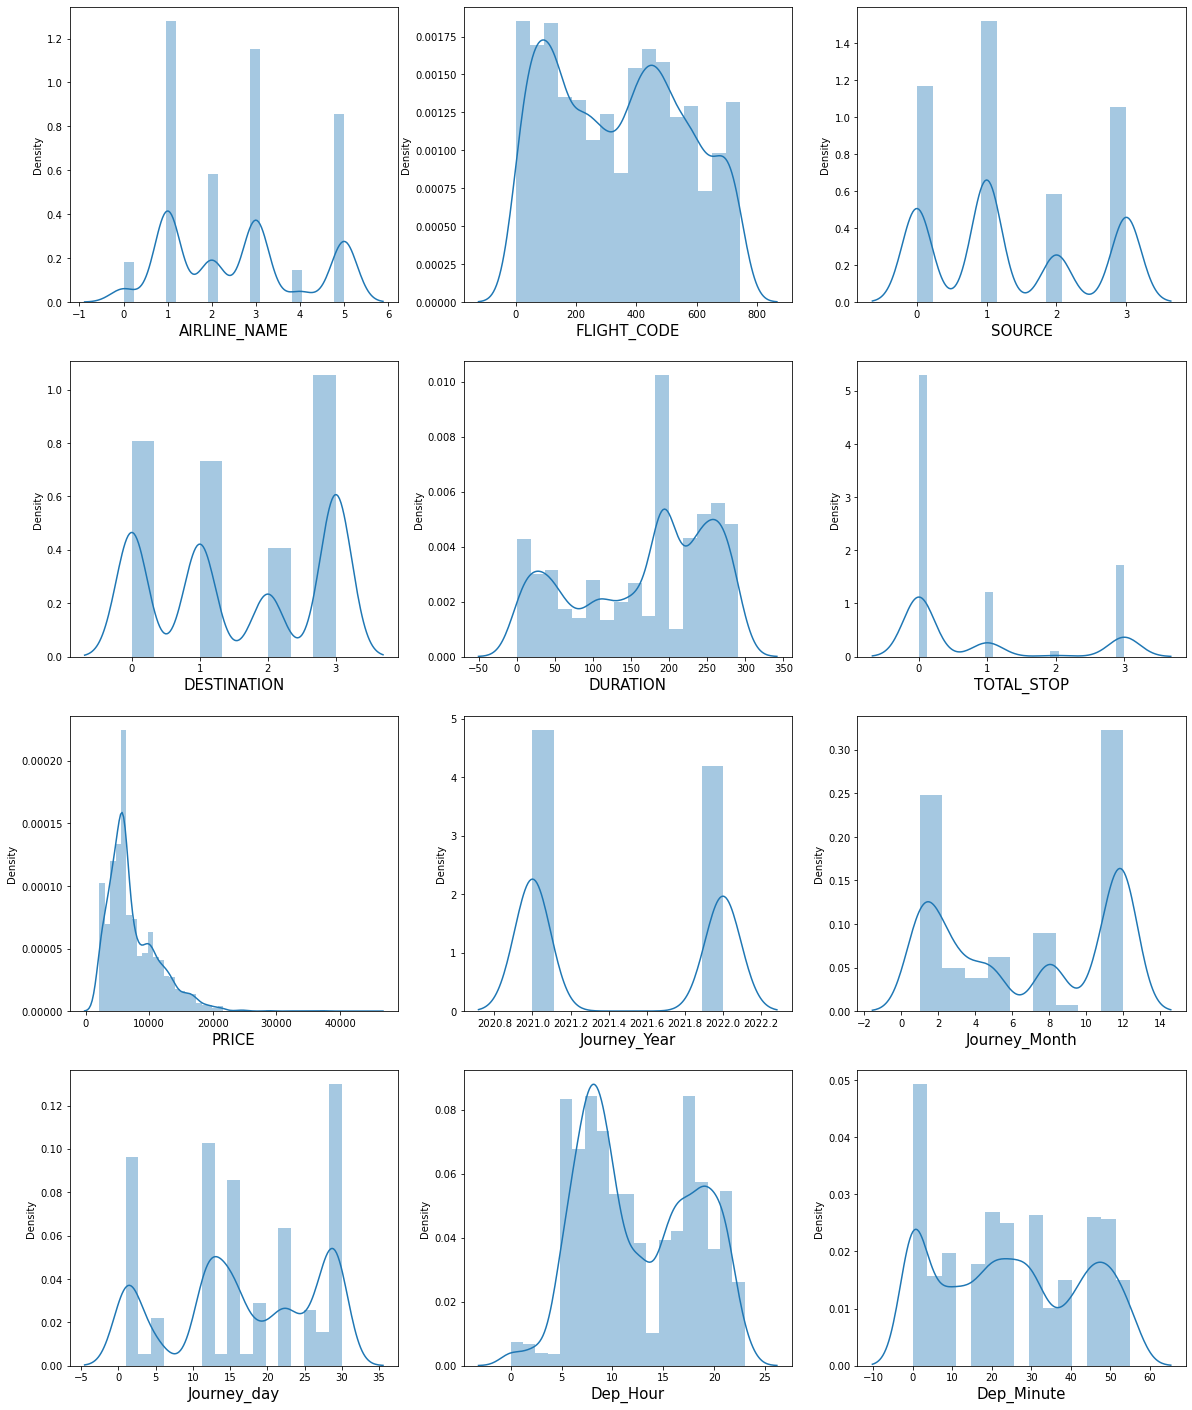

In [199]:
#Relationship Visualizing

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <= 12: # as we see there are twentyfive columns in the data
        ax = plt.subplot(4,3,plotnumber)
        sn.distplot(df[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()

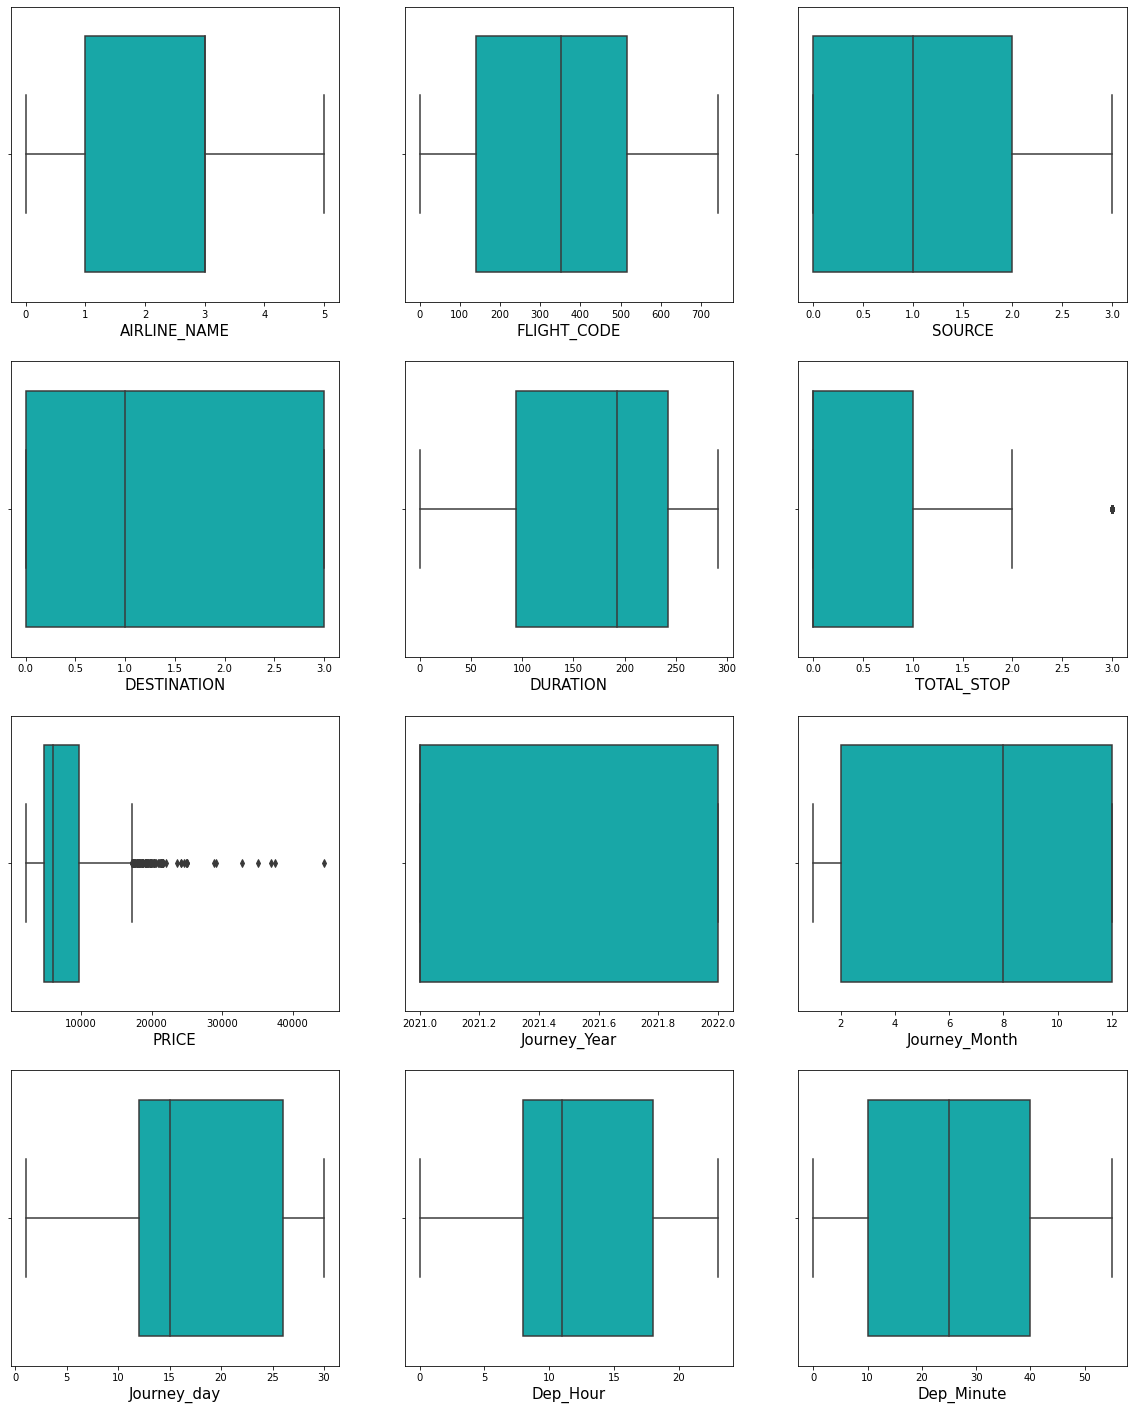

In [198]:
#Relationship Visualizing

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <= 12: # as we see there are twentyfive columns in the data
        ax = plt.subplot(4,3,plotnumber)
        sn.boxplot(df[column], color = 'c')
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()

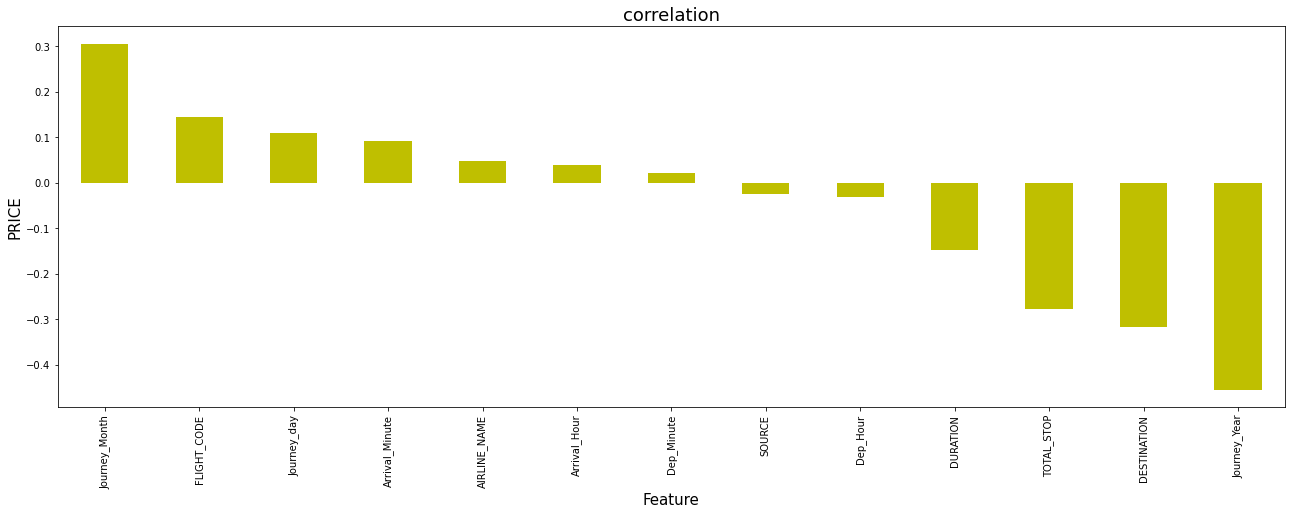

In [157]:
plt.figure(figsize=(22,7))
df.corr()['PRICE'].sort_values(ascending = False).drop(['PRICE']).plot(kind = 'bar', color = 'y')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('PRICE', fontsize = 15)
plt.title('correlation', fontsize = 18)
plt.show()

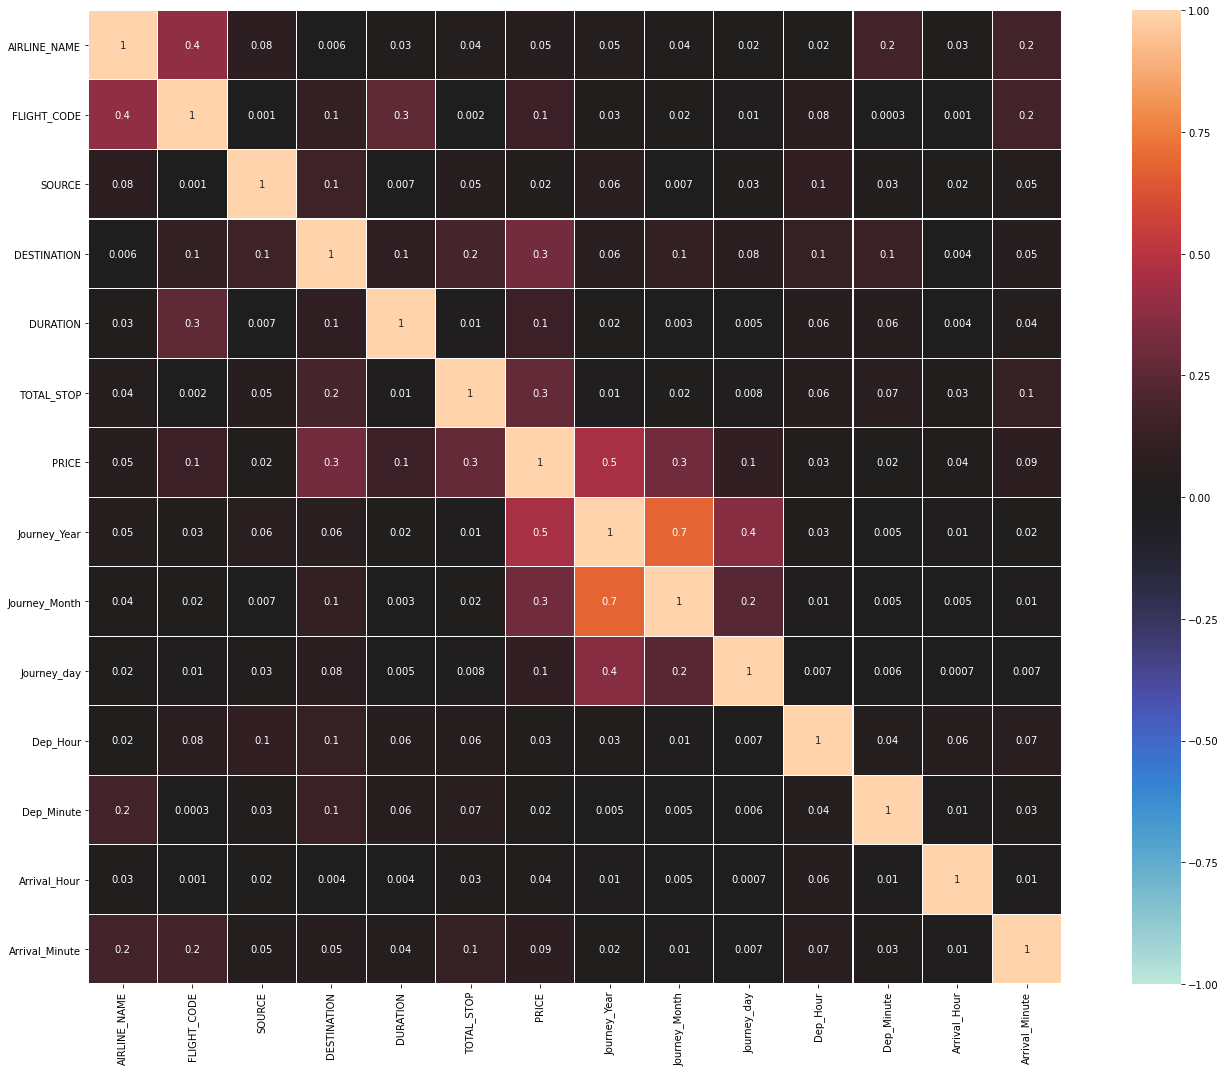

In [158]:
df_cor = df.corr().abs()

plt.figure(figsize = (20,15))
sn.heatmap(df_cor, vmin=-1, vmax= 1, annot=True, square=True,
          center=0, fmt='.1g', linewidths=.1)
plt.tight_layout()

In [200]:
df

,AIRLINE_NAME,FLIGHT_CODE,SOURCE,DESTINATION,DURATION,TOTAL_STOP,PRICE,Journey_Year,Journey_Month,Journey_day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,3,118,2,2,105,3,4566,2021,11,29,5,35,7,5
1,3,106,2,2,105,3,4566,2021,11,29,15,30,17,0
2,1,305,2,2,109,3,4566,2021,11,29,21,10,23,5
3,2,439,2,2,105,3,4567,2021,11,29,20,15,21,45
4,2,487,2,2,106,3,4567,2021,11,29,10,50,12,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4099,5,633,3,1,177,1,17313,2022,3,16,13,30,16,55
4100,5,636,3,1,177,1,17313,2022,3,16,13,30,16,55
4101,5,627,3,1,208,1,17313,2022,3,16,7,20,16,55
4102,5,628,3,1,208,1,17313,2022,3,16,7,20,16,55


In [159]:
df.skew()

AIRLINE_NAME      0.309891
FLIGHT_CODE       0.116571
SOURCE            0.313157
DESTINATION      -0.024426
DURATION         -0.454557
TOTAL_STOP        1.138297
PRICE             1.589890
Journey_Year      0.138785
Journey_Month    -0.029982
Journey_day      -0.218682
Dep_Hour          0.129355
Dep_Minute        0.109323
Arrival_Hour     -0.543733
Arrival_Minute   -0.039403
dtype: float64

As we can see maximm columns are catogorical in nature so, no need to woorried about skewness in it.

#### x= features, y=Target 

In [160]:
x = df.drop(columns = 'PRICE', axis=1)
y = df['PRICE']

## Scalling technique

In [161]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scalar = ss.fit_transform(x)

variables are scaled now using standard scaler technique.

## Variance inflation factor

In [162]:
#import libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scalar, i) for i in range(x_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

,vif,Features
0,1.286981,AIRLINE_NAME
1,1.352532,FLIGHT_CODE
2,1.060404,SOURCE
3,1.166810,DESTINATION
4,1.128354,DURATION
5,1.079337,TOTAL_STOP
6,2.097333,Journey_Year
7,1.915049,Journey_Month
8,1.172872,Journey_day
9,1.050659,Dep_Hour


as we have saw in the table vif value is not greater than 10 for many columns, so its safe to proceed further

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Finding best random state 

In [165]:
from sklearn.tree import DecisionTreeRegressor
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.25, random_state=i)
    mod= DecisionTreeRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, "on Random_state ", maxRS)

Best accuracy is  0.7414999614570943 on Random_state  64


In [166]:
x_train,x_test,y_train,y_test = train_test_split(x_scalar, y, test_size=0.2, random_state = 64)

# 1.Linear Regression Model

In [167]:
from sklearn.linear_model import LinearRegression

Lr=LinearRegression()
Lr.fit(x_train, y_train)

LinearRegression()

In [168]:
pred_test=Lr.predict(x_test)

In [169]:
print(r2_score(y_test,pred_test))

0.40027592927945543


## Cross Validation of Linear Regression 

In [170]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(Lr, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.25770394838186617

## Regularization 

In [171]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters = {'alpha' :[.0001, .001, .01, .1, 1, 10], 'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [172]:
ls = Lasso(alpha = 1, random_state=0)
ls.fit(x_train, y_train)
ls.score(x_train, y_train)
pred_ls = ls.predict(x_test)

laso = r2_score(y_test, pred_ls)
laso

0.4003499788011111

In [173]:
cv_score= cross_val_score(ls, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.25768503160029044

###### The r2 score for linear regression model is : 40.03%
###### Cross validation score for linear regression is : 25.76%

# 2.Random Forest Regression 

In [174]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters ={'criterion':['mse', 'mae'], 'max_features':["auto","sqrt","log2"]}
Rfr= RandomForestRegressor()
clf =GridSearchCV(Rfr, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [175]:
Rfr =RandomForestRegressor(criterion = "mse", max_features="sqrt")
Rfr.fit(x_train, y_train)
Rfr.score(x_train, y_train)
pred_decision = Rfr.predict(x_test)

Rfrs = r2_score(y_test,pred_decision)
print('R2 Score: ',Rfrs*100)

Rfrscore = cross_val_score(Rfr, x, y, cv=3)
Rfrc = Rfrscore.mean()
print('Cross Val Score: ',Rfrc*100)

R2 Score:  82.89229027260217
Cross Val Score:  44.51744683752768


###### The r2 score for Random Forest Regressor model is : 82.89%
###### Cross validation score for Random Forest Regressor is : 44.51%

## 3.Decision Tree Regressor

In [176]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)

DecisionTreeRegressor()

In [177]:
pred_dtree = dtree.predict(x_test)
print(r2_score(y_test,pred_dtree))

0.7242618541766981


In [178]:
cv_score= cross_val_score(dtree, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

-0.6508919245229474

###### The r2 score for Decision tree regression model is : 72.42%
###### Cross validation score for Decision tree regression is : 65.08% 

### So, best model is Decision Tree Regressor.

## Hyper parameter tunning

In [179]:
# Decision tree Classifier
Parameters = {'max_depth': [2, 3, 5, 10, 20, 50],
              'min_samples_leaf': [1, 10, 20, 50, 100],
              'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
              'splitter' : ["best", "random"]
             }

In [180]:
GCV=GridSearchCV(DecisionTreeRegressor(),Parameters,cv=5)

In [181]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 5, 10, 20, 50],
                         'min_samples_leaf': [1, 10, 20, 50, 100],
                         'splitter': ['best', 'random']})

In [182]:
GCV.best_params_ # printing the best parameters found by GridSearchCV

{'criterion': 'friedman_mse',
 'max_depth': 10,
 'min_samples_leaf': 10,
 'splitter': 'best'}

In [183]:
mod = DecisionTreeRegressor( criterion= 'friedman_mse', max_depth= 10, min_samples_leaf= 10, splitter='best')

mod.fit(x_train, y_train)
pred =mod.predict(x_test)
print(r2_score(y_test, pred)*100)

77.29418344987356


#### after hyper parameter tuning decision tree regressor value raise to 77.29%

## Boosting of model with Gradient Boosting

In [184]:
from sklearn.ensemble import GradientBoostingRegressor
gdr = GradientBoostingRegressor()

In [185]:
gdr.fit(x_train, y_train)
y_pred = gdr.predict(x_train)

In [186]:
from sklearn import metrics
print('r2 score', metrics.r2_score(y_train, y_pred))

r2 score 0.7725861029578672


#### After boosting the r2 score will be : 77.25%

## Saving the model

In [188]:
import joblib
joblib.dump(mod,"NewFlightPricePrediction.pkl")

['NewFlightPricePrediction.pkl']

## Loading the model

In [189]:
model = joblib.load("NewFlightPricePrediction.pkl")

In [190]:
prediction = model.predict(x_test)

In [191]:
prediction=pd.DataFrame(prediction)
#converted into data frame

In [192]:
prediction.to_csv('NewFlightPricePredictionResults.csv', index = False)
#prediction saving

Model saved